# Scraped Lineups API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedLineupsAPI/Scraped%20Lineups%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Lineups API

The goal of Scraped Lineups API is to collect and return scraped lineups by the given filters or lineup IDs. This can be done by using the `ScrapedLineupsAPI` class and calling appropriate methods


#### 1. Request by filters

Lineups can be retrieved for specific filters, by calling the `get_lineups` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`imos` List of IMOs

`received_date_from` Earliest date the lineup received

`received_date_to` Latest date the lineup received

`updated_date_from` Earliest date the lineup updated

`updated_date_to` Latest date the lineup updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by lineup IDs

Lineups can be retrieved for specific lineup IDs, by calling the `get_lineups_by_lineup_ids` method with the following argument:

#### Required

`lineup_ids` A list of lineup ids to retrieve

### Additional optional arguments

Both methods, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, in_line_order, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_vessel_name, scraped_imo, scraped_deadweight, scraped_year_built, scraped_eta, scraped_etb, scraped_etd, scraped_location, scraped_quantity, scraped_cargo_type, scraped_api_gravity, scraped_origin, scraped_destination, scraped_supplier, scraped_charterer, scraped_buyer, scraped_port_agent
```

`include_vessel_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
vessel_name, deadweight, year_built, liquid_capacity, vessel_type_id, vessel_type, vessel_class, commercial_operator_id, commercial_operator
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
location_name, location_taxonomy, operation_type, cargo_type, cargo_group, origin_name, origin_taxonomy, destination_name, destination_taxonomy, supplier, charterer, buyer, port_agent, vessel_status
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content, subject
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private
```

> Default value is `True` for the arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_lineups import ScrapedLineupsAPI

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedLineupsAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedLineupsAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker lineups received the last twelve hours, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(hours=12)

And then call `get_lineups` method, as below

In [6]:
scraped_lineups = api.get_lineups(
    vessel_type = vessel_type,
    received_date_from = received_date_from,
)

next(iter(scraped_lineups), None)

ScrapedLineup(lineup_id=6154258, message_id=27161143, parsed_part_id=42480561, line_from=17, line_to=17, in_line_order=None, source='Email', updated_date=datetime.datetime(2022, 8, 25, 8, 8, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2022, 8, 25, 0, 0, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='MARAN HELEN', scraped_deadweight=None, scraped_year_built=None, imo=9779381, vessel_name='Maran Helen', deadweight=156458, year_built=2017, liquid_capacity=172112, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=85, vessel_class='Suezmax', commercial_operator_id=917, commercial_operator='Maran Tankers Management', scraped_eta='2022-09-08 00:00:00', eta=datetime.datetime(2022, 9, 8, 0, 0, tzinfo=datetime.timezone.utc), scraped_etb=None, etb=None, scraped_etd=None, etd=None, scraped_location='TRIESTE', location_geo_id=3565, location_name='Trieste', location_taxonomy_id=2, location_taxonomy='Port', operation_type_id=2, operation_type='Discharge

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_lineups)

df.head()

,lineup_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,6154258,27161143,42480561,17,17,None,Email,2022-08-25 08:08:00+00:00,2022-08-25 00:00:00+00:00,False,...,ExxonMobil,None,None,None,NaN,None,MARAN HELEN;2022-09-08 00:00:00;02:00:00;NO;;;...,SIOT TERMINAL TRIESTE DAILY SITUATION,Signal Ocean,True
1,6154259,27161143,42480561,14,14,None,Email,2022-08-25 08:08:00+00:00,2022-08-25 00:00:00+00:00,False,...,ExxonMobil,None,None,None,NaN,None,NAVIG8 PRECISION;2022-08-31 00:00:00;10:00:00;...,SIOT TERMINAL TRIESTE DAILY SITUATION,Signal Ocean,True
2,6154260,27161143,42480561,16,16,None,Email,2022-08-25 08:08:00+00:00,2022-08-25 00:00:00+00:00,False,...,Shell,None,None,None,NaN,None,ERIK SPIRIT;2022-09-03 00:00:00;18:00:00;NO;;;...,SIOT TERMINAL TRIESTE DAILY SITUATION,Signal Ocean,True
3,6154261,27161143,42480561,15,15,None,Email,2022-08-25 08:08:00+00:00,2022-08-25 00:00:00+00:00,False,...,Ruhr Oel GmbH,None,None,None,NaN,None,MINERVA BALTICA;2022-08-31 00:00:00;22:00:00;N...,SIOT TERMINAL TRIESTE DAILY SITUATION,Signal Ocean,True
4,6154262,27161143,42480561,13,13,None,Email,2022-08-25 08:08:00+00:00,2022-08-25 00:00:00+00:00,False,...,ENI,None,None,None,NaN,None,SUEZ HANS;2022-08-30 00:00:00;12:30:00;NO;;;;;...,SIOT TERMINAL TRIESTE DAILY SITUATION,Signal Ocean,True


#### Request by IMOs

To get lineups for specific vessel(s) by their IMO number(s), you can simple call the `get_lineups` method for a list of desired IMO(s)

In [8]:
imos = df[df.imo > 0].imo.dropna().sample(5, replace=True).astype(int).tolist()  # Or add a list of your desired lineup IDs

imos

[9422457, 9314105, 9737400, 9750050, 9290347]

Adding some date argument is always feasible

In [9]:
scraped_lineups_by_imos = api.get_lineups(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
    imos=imos,
)

df_by_imos = pd.DataFrame(scraped_lineups_by_imos)
df_by_imos.head()

,lineup_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,6154411,27165137,42481496,75,75,None,Email,2022-08-25 08:45:02+00:00,2022-08-25 08:13:27+00:00,False,...,BP,None,None,None,5,Sailed,"SONGA CORAL 682,456 BP ITA...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Signal Ocean,True
1,6154420,27165137,42481496,61,61,None,Email,2022-08-25 08:45:02+00:00,2022-08-25 08:13:27+00:00,False,...,Indian Oil,None,None,None,5,Sailed,"DILIGENT WARRIOR 1,050,572 INDIANOIL IND...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Signal Ocean,True
2,6154422,27165137,42481496,66,66,None,Email,2022-08-25 08:45:02+00:00,2022-08-25 08:13:27+00:00,False,...,Socar,None,None,None,5,Sailed,"BERGEN TS 630,275 SOCAR ITA...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Signal Ocean,True
3,6154856,27165207,42483922,61,61,None,Email,2022-08-25 08:45:16+00:00,2022-08-25 08:13:27+00:00,False,...,Indian Oil,None,None,None,5,Sailed,"DILIGENT WARRIOR 1,050,572 INDIANOIL IND...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Boutros Maritime & Transports,True
4,6154859,27165207,42483922,75,75,None,Email,2022-08-25 08:45:16+00:00,2022-08-25 08:13:27+00:00,False,...,BP,None,None,None,5,Sailed,"SONGA CORAL 682,456 BP ITA...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Boutros Maritime & Transports,True


#### Request by lineup IDs

In the same manner, to get data for specific lineup ID(s), you must call the `get_lineups_by_lineup_ids` method for a list of desired lineup ID(s)

In [10]:
lineup_ids = df.sample(5, replace=True).lineup_id.tolist()  # Or add a list of your desired lineup IDs

lineup_ids

[6158036, 6154268, 6158321, 6154689, 6154686]

Date arguments are not available in `get_lineups_by_lineup_ids` method

In [11]:
scraped_lineups_by_ids = api.get_lineups_by_lineup_ids(
    lineup_ids = lineup_ids,
)

df_by_ids = pd.DataFrame(scraped_lineups_by_ids)
df_by_ids.head()

,lineup_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,6154268,27161143,42480561,10,10,None,Email,2022-08-25 08:08:00+00:00,2022-08-25 00:00:00+00:00,False,...,Varo,None,None,None,NaN,None,GREEN AURA;2022-08-25 00:00:00;11:30:00;NO;;;;...,SIOT TERMINAL TRIESTE DAILY SITUATION,Signal Ocean,True
1,6154686,27164359,42483223,63,63,None,Email,2022-08-25 08:37:12+00:00,2022-08-25 08:21:59+00:00,False,...,None,None,None,None,5.0,Sailed,VALTAMED 1000K KRG FOR...,KRG Oil Daily Report from Botas Ceyhan Termina...,Boutros Maritime & Transports,True
2,6154689,27164359,42483223,55,55,None,Email,2022-08-25 08:37:12+00:00,2022-08-25 08:21:59+00:00,False,...,None,None,None,None,5.0,Sailed,NEVERLAND 600K KRG FOR...,KRG Oil Daily Report from Botas Ceyhan Termina...,Boutros Maritime & Transports,True
3,6158036,27172628,42489945,10,10,None,Email,2022-08-25 10:32:24+00:00,2022-08-25 10:28:56+00:00,False,...,Reliance,None,None,None,4.0,AtBerth,at berth\tspm2\tmt minerva iris\t17.08.22\t25....,CPP Vessels Line up at all Indian Ports,Gac Shipping,True
4,6158321,27172742,42490034,38,38,None,Email,2022-08-25 10:33:15+00:00,2022-08-25 10:30:08+00:00,False,...,Hindustan Petroleum,None,None,None,4.0,AtBerth,at berth\tjd - 5\tmt antigua i\t20.08.22\t24.0...,Crude oil Vessel position at all Indian Ports,Gac Shipping,True


#### Usage of optional arguments

By default, all fields are returned. This is convenient in many cases, for example to compare scraped and mapped fields

In [12]:
fields_to_display = [
    'scraped_vessel_name',
    'vessel_name',
    'scraped_location',
    'location_name',
    'scraped_origin',
    'origin_name',
    'scraped_cargo_type',
    'cargo_type',
    'scraped_quantity',
    'quantity',
]

df[fields_to_display].head()

,scraped_vessel_name,vessel_name,scraped_location,location_name,scraped_origin,origin_name,scraped_cargo_type,cargo_type,scraped_quantity,quantity
0,MARAN HELEN,Maran Helen,TRIESTE,Trieste,LIZA UNITY,FPSO Liza Unity,GOLD,None,142000.0,142000.0
1,NAVIG8 PRECISION,Navig8 Precision,TRIESTE,Trieste,HOUSTON,Houston,WTM,WTI Midland,91625.0,91625.0
2,ERIK SPIRIT,Erik Spirit,TRIESTE,Trieste,MONGSTAD,Mongstad,JOHAN,Johan Sverdrup,103336.0,103336.0
3,MINERVA BALTICA,Minerva Baltica,TRIESTE,Trieste,UST LUGA,Ust-Luga,REBCO,Russian Export Blend,80000.0,80000.0
4,SUEZ HANS,Suez Hans,TRIESTE,Trieste,BASRAH,Basrah,BAS M,Basrah Medium,50000.0,50000.0


## Examples

Let's start by fetching all tanker lineups received the last week

In [13]:
example_vessel_type = 1  # tanker
example_date_from = datetime.utcnow() - timedelta(days=7)

example_scraped_lineups = api.get_lineups(
   vessel_type=example_vessel_type,
   received_date_from=example_date_from,
)

#### Exclude deleted scraped lineups

The `is_deleted` property of a scraped lineup indicates whether it is valid or not. If it is set to `True`, the corresponding `lineup_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped lineups in the following examples.

In [14]:
data = pd.DataFrame(example_scraped_lineups)

data = data[~data.is_deleted]

data.head()

,lineup_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,6023696,26853434,42216439,6,6,None,Email,2022-08-18 15:15:25+00:00,2022-08-18 10:54:18+00:00,False,...,Total,None,NaN,None,-1.0,Unknown,ZEUS;2022-08-13 00:00:00;WTI;55000+58000;Total...,Port situation - Fos crude oil terminal - 18/8/22,Ferrari Shipping Agency,True
1,6023697,26853434,42216439,12,12,None,Email,2022-08-18 15:15:25+00:00,2022-08-18 10:54:18+00:00,False,...,Varo,None,NaN,None,1.0,Expected,CEDAR;Fos 3 (C.oil);CJ Blend;85000;Spse/Varo;W...,Port situation - Fos crude oil terminal - 18/8/22,Ferrari Shipping Agency,True
2,6023698,26853434,42216439,17,17,None,Email,2022-08-18 15:15:25+00:00,2022-08-18 10:54:18+00:00,False,...,Varo,None,NaN,None,-1.0,Unknown,RUNNER;28/18h00;Okono;125000;Spse/Varo;Wes Afr...,Port situation - Fos crude oil terminal - 18/8/22,Ferrari Shipping Agency,True
3,6023699,26853434,42216439,18,18,None,Email,2022-08-18 15:15:25+00:00,2022-08-18 10:54:18+00:00,False,...,ExxonMobil,None,NaN,None,-1.0,Unknown,EBN HAWKEL;29/21h00;Lokele;93000;Esso ;West Af...,Port situation - Fos crude oil terminal - 18/8/22,Ferrari Shipping Agency,True
4,6023700,26853434,42216439,19,19,None,Email,2022-08-18 15:15:25+00:00,2022-08-18 10:54:18+00:00,False,...,Petroineos,None,NaN,None,-1.0,Unknown,SEAFAITH;2022-09-02 00:00:00;cpc;94000;Petroin...,Port situation - Fos crude oil terminal - 18/8/22,Ferrari Shipping Agency,True


#### Top 10 Ports

In this example, we will find the top 10 Ports, based on the number of distinct operations

In [15]:
top_ports = data[['location_name', 'imo', 'operation_type']]\
    .drop_duplicates()\
    .location_name\
    .value_counts()\
    .head(10)\
    .index\
    .tolist()

top_ports_df = data[data.location_name.isin(top_ports)]

top_ports_pivot = pd.pivot_table(
    top_ports_df,
    index='location_name',
    columns='operation_type',
    values='imo',
    aggfunc=lambda x: len(x.unique()),
    fill_value=0,
).reset_index().rename_axis(None, axis=1)

top_ports_pivot.index = top_ports_pivot.location_name

top_ports_pivot  = top_ports_pivot.loc[top_ports].reset_index(drop=True)
top_ports_pivot

,location_name,Discharge,Load
0,Basrah,0,9
1,Sikka,26,22
2,Ceyhan,0,36
3,Jose Terminal,0,21
4,Trieste,18,0
5,Kuala Tanjung,4,14
6,Genoa,13,2
7,Milazzo,6,9
8,Fos,13,0
9,Mumbai,10,2


And display results in a stacked bar plot

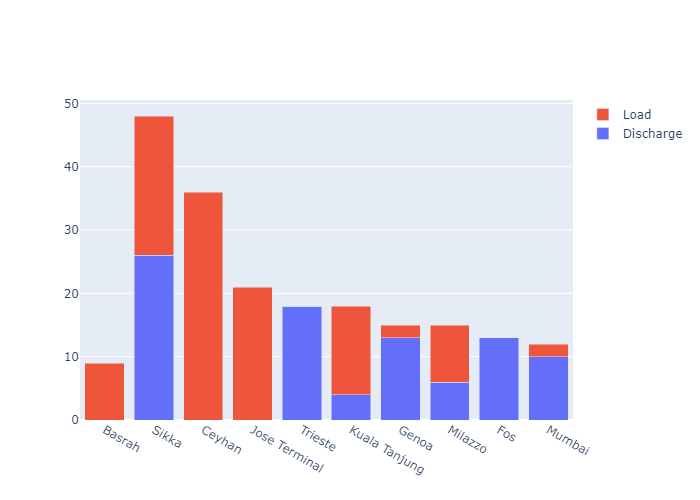

In [16]:
ports_list = top_ports_pivot.location_name.tolist()

disch_bar = 'Discharge' in top_ports_pivot and go.Bar(
    name='Discharge',
    x=ports_list,
    y=top_ports_pivot.Discharge.tolist(),
)
load_bar = 'Load' in top_ports_pivot and go.Bar(
    name='Load',
    x=ports_list,
    y=top_ports_pivot.Load.tolist(),
)
waypoint_bar = 'Waypoint' in top_ports_pivot and go.Bar(
    name='Waypoint',
    x=ports_list,
    y=top_ports_pivot.Waypoint.tolist(),
)
fig_data = list(filter(
    lambda x: x,
    [disch_bar, load_bar, waypoint_bar]
))

fig = go.Figure(data=fig_data)

fig.update_layout(barmode='stack')
fig.show()

#### Imported quantity in specific ports

In this example, we will create a visualization, for the total cargo quantity discharging in specifc ports per day over the next week

In [17]:
ports = data[data.operation_type == 'Discharge'][['imo', 'location_name']]\
    .drop_duplicates()\
    .location_name\
    .value_counts()\
    .head()\
    .index\
    .tolist()

this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')

ports

['Sikka', 'Trieste', 'Fos', 'Genoa', 'Mumbai']

Create the pivot table

In [18]:
exports_mask = data.location_name.isin(ports) & (data.operation_type == 'Discharge')

df_exports = data[exports_mask][['eta', 'location_name', 'quantity', 'imo']].drop_duplicates()

df_pivot = pd\
    .pivot_table(
        df_exports,
        columns='location_name',
        index='eta',
        values='quantity',
        aggfunc=sum,
        fill_value=0,
    )\
    .reindex(index=this_week_days, fill_value=0)\
    .reset_index()\
    .rename(columns={'index': 'eta'})\
    .rename_axis(None, axis=1)

df_pivot

,eta,Fos,Genoa,Mumbai,Sikka,Trieste
0,2022-08-25 00:00:00+00:00,94000,138000,21000,1704413,296007
1,2022-08-26 00:00:00+00:00,93000,30000,15000,506696,0
2,2022-08-27 00:00:00+00:00,0,0,0,773493,0
3,2022-08-28 00:00:00+00:00,125000,0,0,505000,98913
4,2022-08-29 00:00:00+00:00,269000,0,0,270000,85000
5,2022-08-30 00:00:00+00:00,136000,0,0,0,50000
6,2022-08-31 00:00:00+00:00,0,0,10000,140600,171625


And display the results as timeseries

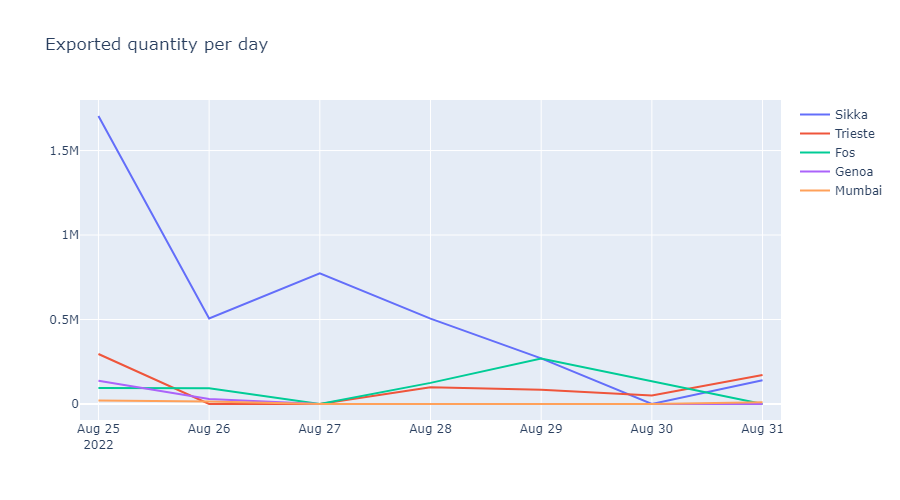

In [19]:
def port_button(port):
    args = [
        {'visible': [i == ports.index(port) for i in range(len(ports))]},
        {
            'title': f'Exported quantity in {port} per day',
            'showlegend': True
        },
    ]
    
    return dict(
        label=port,
        method='update',
        args=args,
    )

title = 'Exported quantity per day'
today = datetime.combine(datetime.utcnow().date(), datetime.min.time())

ports_fig = go.Figure()

port_buttons = []

for port in ports:
    if port not in df_pivot.columns:
        continue
    port_scatter_plot = go.Scatter(    
        x = df_pivot.eta,
        y = df_pivot[port],
        name=port,
        mode='lines',
    )

    ports_fig.add_trace(port_scatter_plot)
    
    port_buttons.append(port_button(port))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(ports))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *port_buttons,
])

ports_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )],
    xaxis_range=[today - timedelta(hours=4), today + timedelta(hours=24*6 + 4)],
)

ports_fig.show()

#### Export data to csv

In [20]:
output_path = '' # Change output_path with your path
filename = 'last_week_lineups.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)